In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from seaborn import load_dataset 

Using the attached dataset to develop, train, and evaluate a group of linear regression models to predict the price (dependent variable) of a Monet painting from a few of its features (independent variables). Create your model in Python.

Tasks: 1. Create at least two simple linear regression models, each of them has one different independent variable (you may transform the raw independent variable into different formats, such as to conduct a logarithmic transformation or combine two variables into a new variable such as Size = width * height). You may consider one variable as Size, and another one as Width. Create a scatter plot for showing the relationship between the independent variable and the dependent variable for each model, and also showing the linear regression line in the same plot. Calculate the error of the prediction with test data. 

2. Create a multivariate linear regression model. You may need to consider the normalization of the raw data. Calculate the error of the prediction with test data. 

Dataset: monet.csv Download monet.csv

Submit your code, test results including visualizations, and report. 

In [2]:
#Read the csv file
df = pd.read_csv('monet.csv')

In [3]:
df

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2
...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1
426,9.352500,25.9,39.6,1,375,2
427,8.252500,25.6,39.6,1,375,1
428,3.410000,25.6,39.4,1,386,2


# Cleaning the data

### Check for null values, and visualize them:

         missing_values   percent_missing %
PRICE                  0                0.0
HEIGHT                 0                0.0
WIDTH                  0                0.0
SIGNED                 0                0.0
PICTURE                0                0.0
HOUSE                  0                0.0


Text(0.5, 0, 'Missing Values')

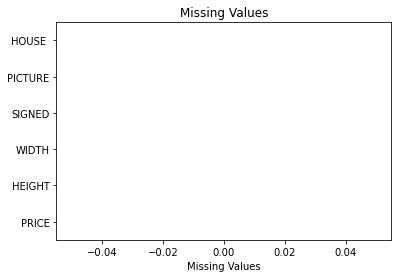

In [4]:
# number of missing values in the dataset
missing_values = df.isnull().sum() 

# missing value percent %
percent_missing = missing_values / df.shape[0]*100 

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}

#Constructing DataFrame from a dictionary 
frame = pd.DataFrame(value) 
print(frame)
df.isnull().sum().sort_values().plot(kind="barh", title="Missing Values");
plt.xlabel('Missing Values')
#There is no null values, so the visuallization empty.

# The data is clean, I can start EDA:

### In this step I explore and analyze the data:

In [5]:
df.info()
#check data type for avoiding future errors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 20.3 KB


In [6]:
#statistics 
df.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000


In [7]:
# Add size column which = width * height
df['SIZE']=df['HEIGHT']*df['WIDTH']
df

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40
...,...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1,1008.64
426,9.352500,25.9,39.6,1,375,2,1025.64
427,8.252500,25.6,39.6,1,375,1,1013.76
428,3.410000,25.6,39.4,1,386,2,1008.64


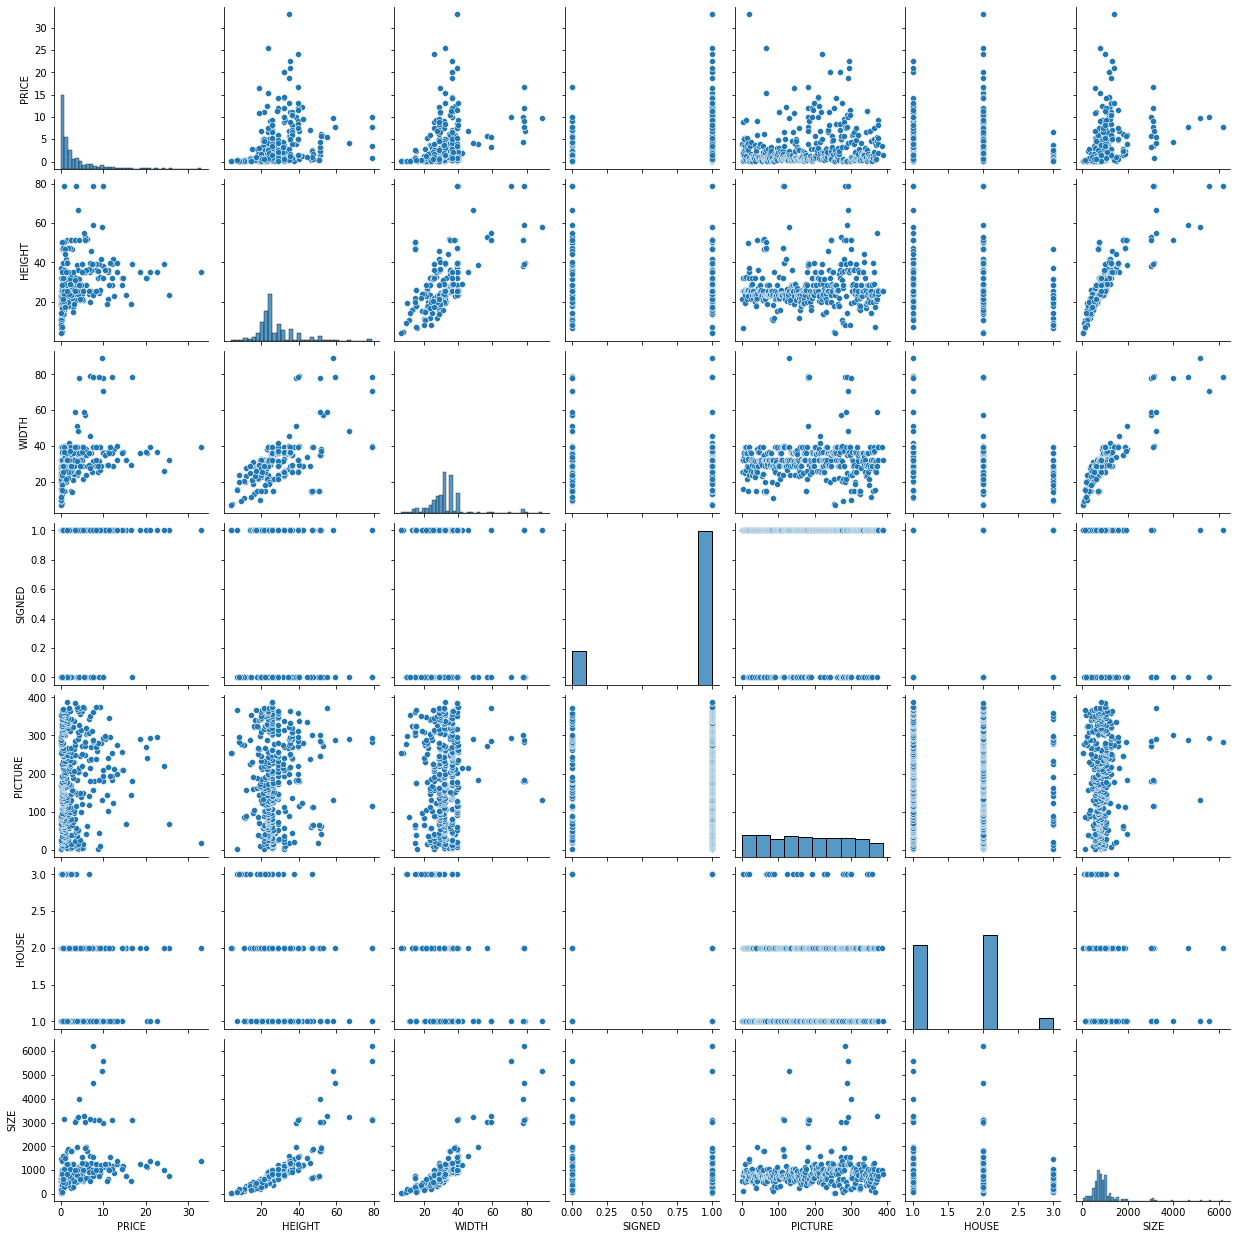

In [8]:
sns.pairplot(df)
#explore correlations
#I find out that best features that I can use in my simple regression is Width, Size, and Highet

# First simple linear regression

Height and Price

C:\Users\Fatoo\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


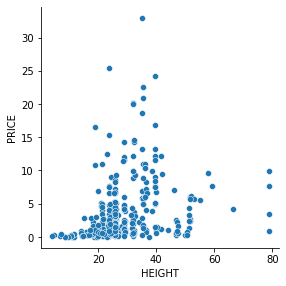

In [9]:
# for showing the relationship between the independent variable and the dependent variable. 
sns.pairplot(df, x_vars='HEIGHT', y_vars='PRICE', size=4, aspect=1, kind='scatter')
plt.show()

In [10]:
X = df[['HEIGHT']] 
y = df['PRICE'] # target - prediction

In [11]:
#Split data into training and testing:
#test_size = 20% while training =80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                     random_state = 100)

In [12]:
# Creating object of Linear Regression and fitting data 
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predicting the y values corresponding to X_test_sm
y_pred = linear_r.predict(X_test)

In [14]:
#Check the results of  predection and the real price
newdf = pd.DataFrame({'Price': y_test, 'Predicted Price': y_pred})
newdf

,Price,Predicted Price
84,15.402500,2.421492
133,0.486048,3.662715
305,1.762500,2.693955
23,0.237068,6.402487
278,7.152500,2.709092
...,...,...
424,3.850000,2.709092
342,9.906000,10.746768
284,20.167500,3.662715
319,5.062500,4.797980


#### Time of evaluation 

In [16]:
r2_score(y_test, y_pred)
#

0.005275399260191604

In [17]:
mean_squared_error(y_test,y_pred)

13.378461215111487

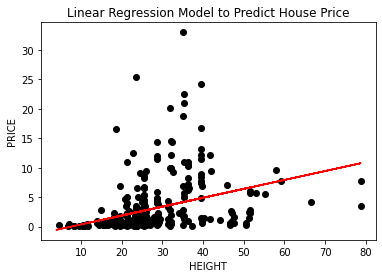

In [18]:
#scatter plot for showing the relationship between variables in the model
#also showing the linear regression line in the same plot. 
plt.scatter(X_train, y_train, color = 'black')
plt.plot(X_test, y_pred, color = 'red')

plt.title('Linear Regression Model to Predict House Price')
plt.xlabel('HEIGHT')
plt.ylabel('PRICE')
plt.show()

# Simple Linear Regression 2

Width and Price

C:\Users\Fatoo\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


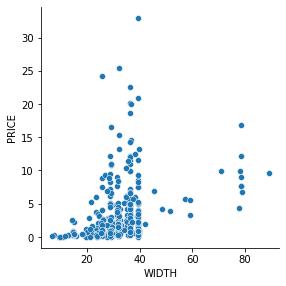

In [19]:
# for showing the relationship between the independent variable and the dependent variable. 
sns.pairplot(df, x_vars='WIDTH', y_vars='PRICE', size=4, aspect=1, kind='scatter')
plt.show()

In [20]:
X = df[['WIDTH']] 
y = df['PRICE'] # target - prediction

In [21]:
#Split data into training and testing:
#test_size = 20% while training =80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                     random_state = 100)

In [22]:
# Creating object of Linear Regression and fitting data 
lr_r = LinearRegression()
lr_r.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predicting the y values corresponding to X_test_sm
y_pred = lr_r.predict(X_test)

In [24]:
#Check the results of  predection and the real price
df1 = pd.DataFrame({'Price': y_test, 'Predicted Price': y_pred})
df1

,Price,Predicted Price
84,15.402500,3.044770
133,0.486048,1.730808
305,1.762500,3.044770
23,0.237068,0.355732
278,7.152500,3.671194
...,...,...
424,3.850000,4.144831
342,9.906000,8.957598
284,20.167500,3.655915
319,5.062500,3.014213


#### Evaluation:

In [25]:
#Calculate the error of the prediction with test data. 
print("Training set score: {:.2f}".format(lr_r.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr_r.score(X_test, y_pred)))

Training set score: 0.13
Test set score: 1.00


In [26]:
r2_score(y_test, y_pred)
#

0.07403227591311845

In [27]:
mean_squared_error(y_test,y_pred)

12.453721637052137

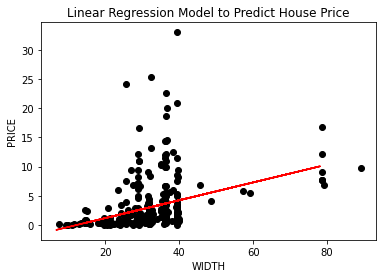

In [28]:
#scatter plot for showing the relationship between variables in the model
#also showing the linear regression line in the same plot. 
plt.scatter(X_train, y_train, color = 'black')
plt.plot(X_test, y_pred, color = 'red')

plt.title('Linear Regression Model to Predict House Price')
plt.xlabel('WIDTH')
plt.ylabel('PRICE')
plt.show()

# Simple Linear Regression 3

#### Size and Price

C:\Users\Fatoo\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


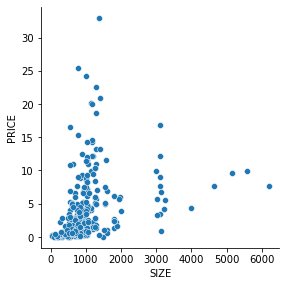

In [29]:
# for showing the relationship between the independent variable and the dependent variable. 
sns.pairplot(df, x_vars='SIZE', y_vars='PRICE', size=4, aspect=1, kind='scatter')
plt.show()

In [30]:
X = df[['SIZE']] 
y = df['PRICE'] # target - prediction

In [31]:
#Split data into training and testing:
#test_size = 20% while training =80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                     random_state = 100)

In [32]:
# Creating object of Linear Regression and fitting data 
l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predicting the y values corresponding to X_test_sm
y_pred = l_r.predict(X_test)

In [34]:
#Check the results of  predection and the real price
df2 = pd.DataFrame({'Price': y_test, 'Predicted Price': y_pred})
df2

,Price,Predicted Price
84,15.402500,2.588555
133,0.486048,2.562735
305,1.762500,2.733852
23,0.237068,2.505478
278,7.152500,3.005042
...,...,...
424,3.850000,3.203985
342,9.906000,14.663229
284,20.167500,3.570334
319,5.062500,3.836109


#### Evaluating 

In [35]:
#Calculate the error of the prediction with test data. 
print("Training set score: {:.2f}".format(l_r.score(X_train, y_train)))
print("Test set score: {:.2f}".format(l_r.score(X_test, y_pred)))

Training set score: 0.13
Test set score: 1.00


In [36]:
r2_score(y_test, y_pred)

0.022746635808783333

In [37]:
mean_squared_error(y_test,y_pred)

13.143483352523656

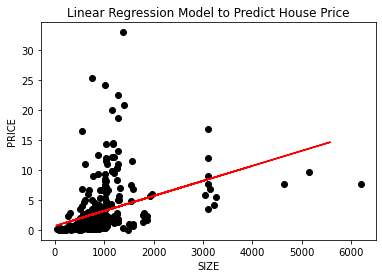

In [38]:
#scatter plot for showing the relationship between variables in the model
#also showing the linear regression line in the same plot. 
plt.scatter(X_train, y_train, color = 'black')
plt.plot(X_test, y_pred, color = 'red')

plt.title('Linear Regression Model to Predict House Price')
plt.xlabel('SIZE')
plt.ylabel('PRICE')
plt.show()

# Multivariate linear regression model

Y = b0 + b1X1 + b2X2....

In [48]:
from sklearn import preprocessing

Consider the normalization of the raw, so range of data is between 0 and 1

In [55]:
column_maxes = df.max()
df_max = column_maxes.max()
norm_df = df / df_max
print(norm_df)

        PRICE    HEIGHT     WIDTH    SIGNED   PICTURE    HOUSE       SIZE
0    0.000645  0.003439  0.004133  0.000161  0.000161  0.000161  0.088038
1    0.001421  0.005150  0.004133  0.000161  0.000323  0.000323  0.131850
2    0.000021  0.001114  0.002567  0.000000  0.000484  0.000484  0.017713
3    0.000329  0.004149  0.005167  0.000161  0.000646  0.000323  0.132780
4    0.000240  0.004149  0.005167  0.000161  0.000646  0.000323  0.132780
..        ...       ...       ...       ...       ...       ...       ...
425  0.000853  0.004133  0.006361  0.000161  0.060545  0.000161  0.162850
426  0.001510  0.004182  0.006394  0.000161  0.060545  0.000323  0.165594
427  0.001332  0.004133  0.006394  0.000161  0.060545  0.000161  0.163676
428  0.000551  0.004133  0.006361  0.000161  0.062321  0.000323  0.162850
429  0.000249  0.004149  0.005167  0.000161  0.062483  0.000161  0.132780

[430 rows x 7 columns]


In [60]:
#Check the range
print('Max of Normalized data frame :',norm_df.max())
print('Min of Normalized data frame :',norm_df.min())

Max of Normalized data frame : PRICE      0.005330
HEIGHT     0.012706
WIDTH      0.014369
SIGNED     0.000161
PICTURE    0.062483
HOUSE      0.000484
SIZE       1.000000
dtype: float64
Min of Normalized data frame : PRICE      0.000002
HEIGHT     0.000630
WIDTH      0.001082
SIGNED     0.000000
PICTURE    0.000161
HOUSE      0.000161
SIZE       0.004219
dtype: float64


In [61]:
v = ['WIDTH', 'HEIGHT', 'SIZE']

X = norm_df[v]
y = norm_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2)

In [64]:
Multivariate_lr = LinearRegression()

In [65]:
Multivariate_lr.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = Multivariate_lr.predict(X_test)

In [67]:
#Check the results of  predection and the real price
df1 = pd.DataFrame({'Price': y_test, 'Predicted Price': y_pred})
df1

,Price,Predicted Price
20,0.000462,0.000337
390,0.000083,0.000310
119,0.000344,0.000377
194,0.000086,0.000353
192,0.000129,0.000246
...,...,...
284,0.003256,0.000605
212,0.000236,0.000573
225,0.000089,0.000219
358,0.000056,0.000023


#### Evaluating

In [68]:
r2_score(y_test, y_pred)

0.10771709516548422

In [69]:
mean_squared_error(y_test,y_pred)

6.321086305032376e-07